### Census data for City of Pittsburgh Neighborhoods (Hayden G.)

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from fpsnippets import census_to_neighborhoods
from fpsnippets import geo_to_neighborhood
%matplotlib inline

### Here is what the data looks like

In [2]:
data = pd.read_csv("census.csv", sep=",")
data

,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,2010_Any_other_single_race_alone_Popualtion,2010_Population_two_or_more_races,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_population,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,933,896,381,453,4,56,1,1,37,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,462,448,354,84,1,7,0,2,14,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,2500,2384,1485,878,9,1,0,11,116,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,71,...,-73,-153,-246,44,-4,9,0,44,80,39
4,Banksville,4144,4053,3651,169,2,211,0,20,91,...,-17,-197,-460,25,5,174,2,57,180,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Upper Lawrenceville,2669,2590,1754,751,10,37,1,37,79,...,-275,-324,264,-597,-5,37,-1,-22,49,-17
85,West End,254,235,135,95,0,2,0,3,19,...,-49,-55,-17,-45,1,4,2,0,6,10
86,West Oakland,2604,2558,1373,1003,7,169,0,6,46,...,-70,-103,159,-395,-1,28,2,104,33,51
87,Westwood,3066,2980,2535,250,3,174,1,17,86,...,266,167,-339,28,0,418,1,59,99,78


### Print All Neighborhoods with Populations, With Total and Average

In [26]:
table = {}
for index, row in data.iterrows():
    table.update({row["Neighborhood"]: 0})

for index, row in data.iterrows():
    table[row["Neighborhood"]] = row["2020_Total_Population"]
    
for i in table:
    print(i + ": " + str(table[i]))
    print("--------")

    
avg = round(data["2020_Total_Population"].mean())
total = round(data["2020_Total_Population"].sum())
print("Average: " + str(avg))
print("Pittsburgh Total: " + str(total))

Allegheny Center: 1419
--------
Allegheny West: 540
--------
Allentown: 2305
--------
Arlington - Arlington Heights (Combined): 2040
--------
Banksville: 4127
--------
Bedford Dwellings: 1386
--------
Beechview: 7596
--------
Beltzhoover: 1604
--------
Bloomfield: 8665
--------
Bluff: 5882
--------
Bon Air: 759
--------
Brighton Heights: 7105
--------
Brookline: 13063
--------
California-Kirkbride: 709
--------
Carrick: 10290
--------
Central Business District (Downtown): 5477
--------
Central Lawrenceville: 4720
--------
Central Northside: 2972
--------
Central Oakland: 5835
--------
Chartiers City: 492
--------
Chateau: 19
--------
Crafton Heights: 3999
--------
Crawford-Roberts: 2293
--------
Duquesne Heights: 2397
--------
East Allegheny: 1903
--------
East Carnegie: 491
--------
East Hills: 2892
--------
East Liberty: 6187
--------
Elliott: 2193
--------
Esplen: 322
--------
Fairywood: 1092
--------
Fineview: 1140
--------
Friendship: 1963
--------
Garfield: 3643
--------
Glen Haz

### Plot The Data with the Population Percent

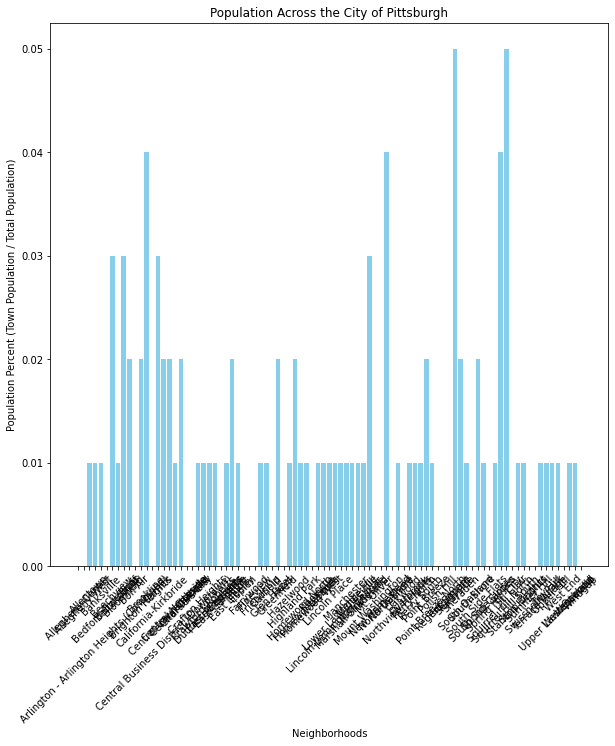

In [36]:
combined_data = {
    'Population': [],
    'Places': []
}

for i in table:
    newVal = round(table[i]/total, 2)
    
    combined_data["Population"].append(newVal)
    combined_data["Places"].append(i)


combined_df = pd.DataFrame(combined_data)
plt.figure(figsize=(10, 10))
plt.bar(combined_df['Places'], combined_df['Population'], color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Population Percent (Town Population / Total Population)')
plt.title('Population Across the City of Pittsburgh')
plt.xticks(rotation=45)
plt.show()